In [ ]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df = covid_data.merge(
    vaccinations_data,
    how='left',
    on=['date','country']
)
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
# display(covid_df.groupby('country')['death_rate'].max()['United States'])
# display(covid_df.groupby('country')['recover_rate'].mean()['Russia'])
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()

<Axes: title={'center': 'Заболеваемость в мире'}, xlabel='date'>

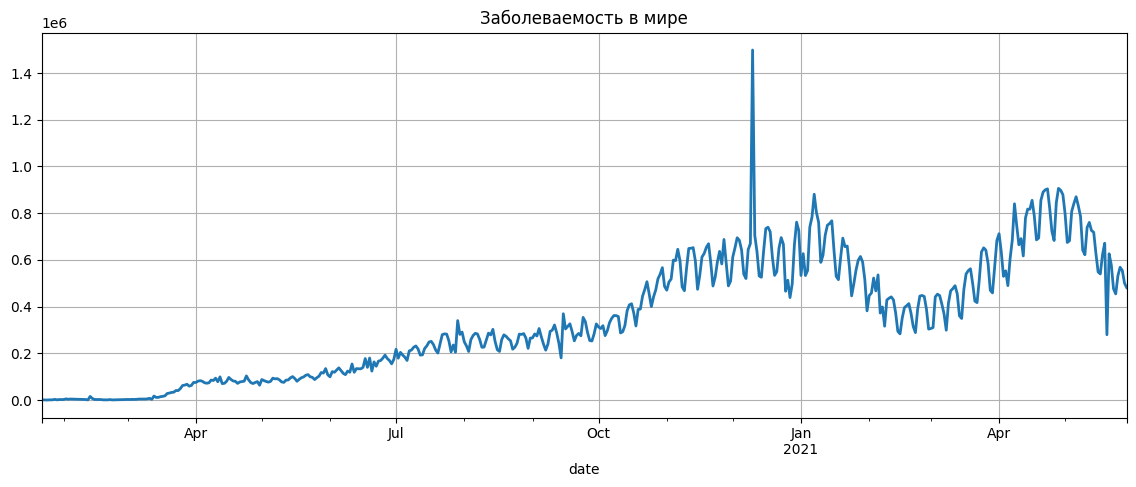

In [64]:
grouped_cases.plot(
    kind='line',
    figsize=(14, 5),
    title='Заболеваемость в мире',
    grid=True,
    lw=2
)

<Axes: title={'center': 'Ежедневное распределение заболеваемости'}, ylabel='Frequency'>

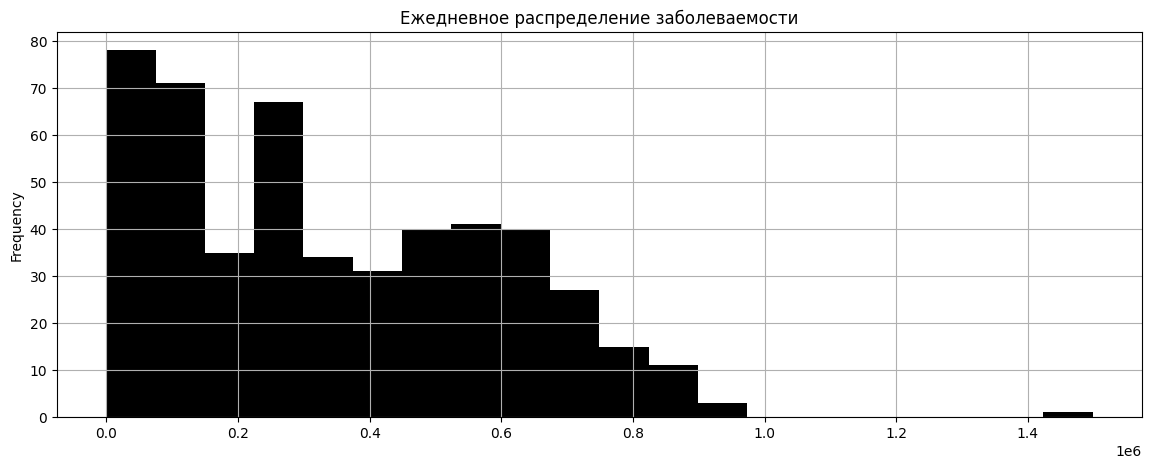

In [62]:
grouped_cases.plot(
    kind='hist',
    figsize=(14,5),
    grid=True,
    title='Ежедневное распределение заболеваемости',
    color='black',
    bins=20
)

<Axes: xlabel='country'>

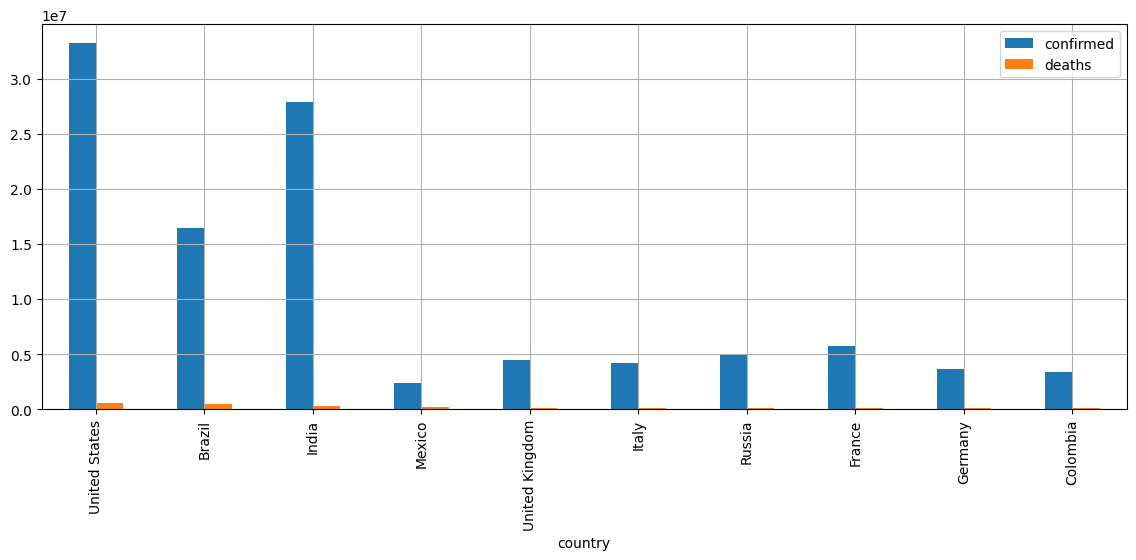

In [65]:
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(14,5),
)

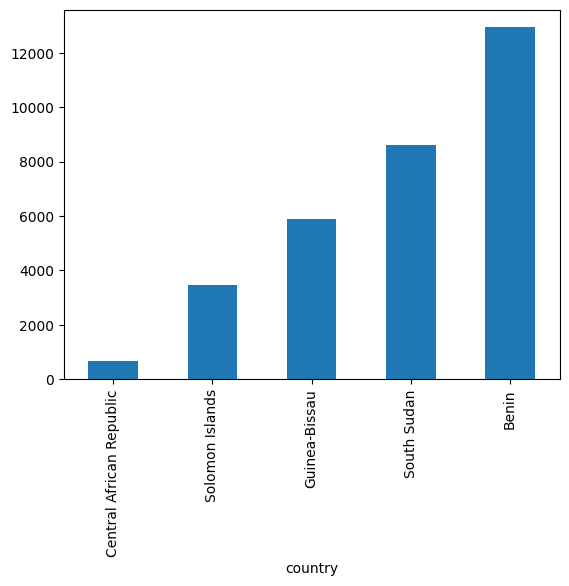

In [66]:
vacc_total_country = covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

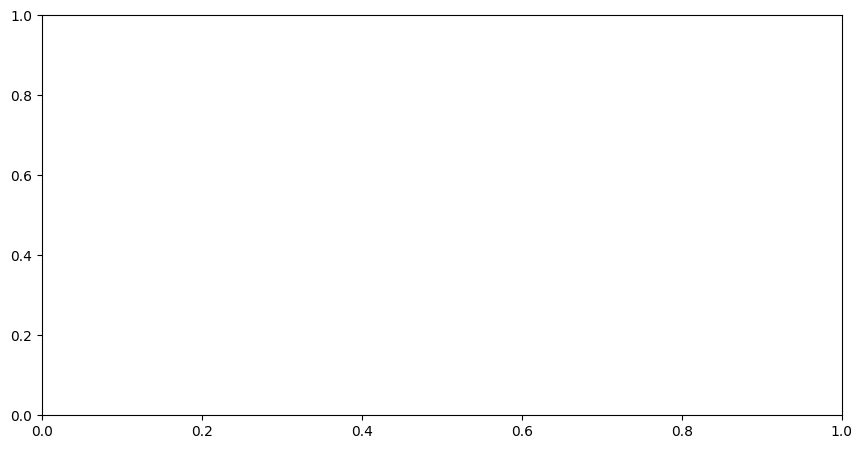

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

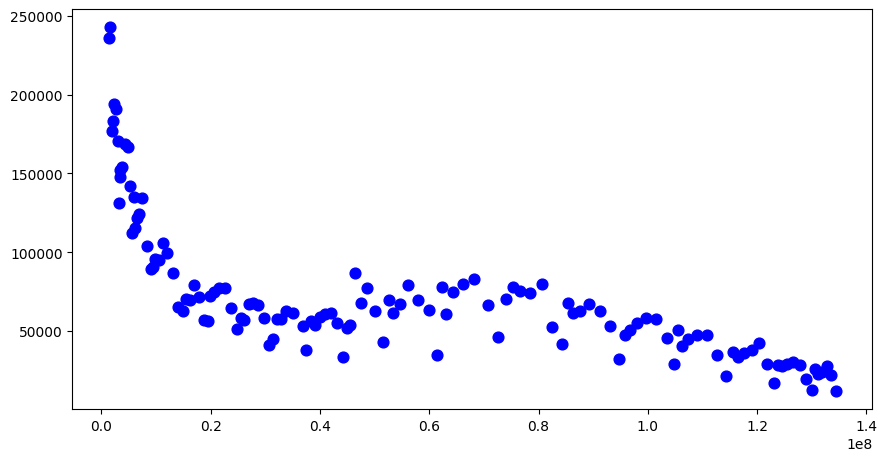

In [84]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
us_data = covid_df[covid_df['country']=='United States']
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=60,
    marker='o',
    c='blue'
)

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64

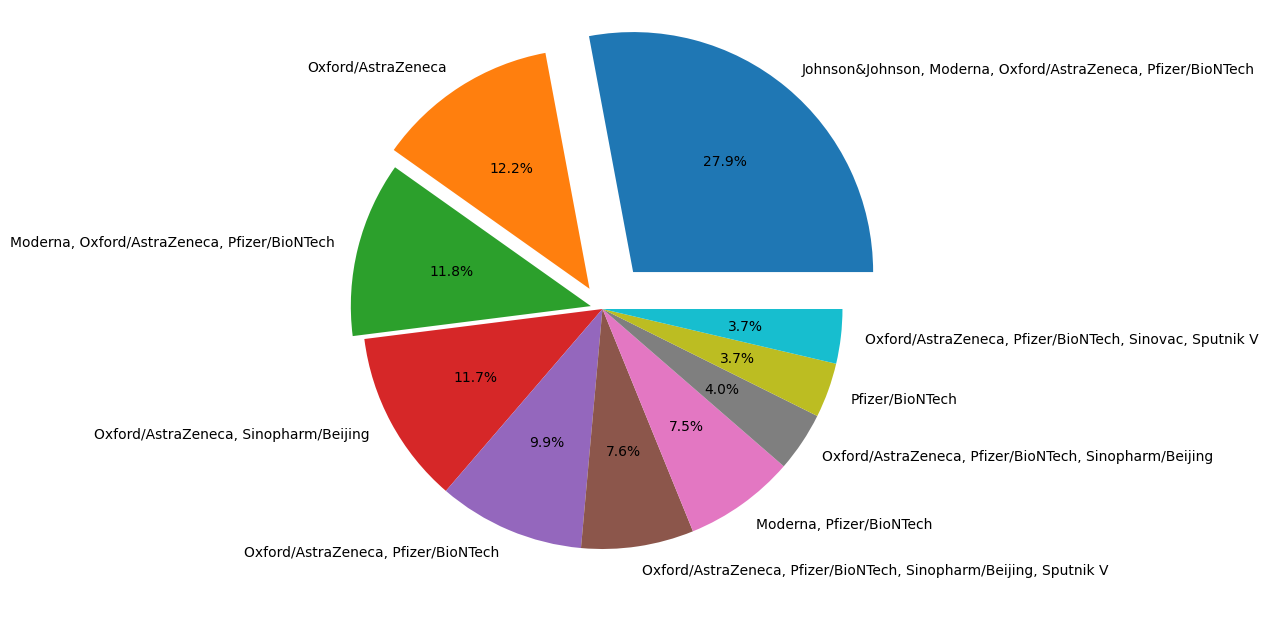

In [171]:
fig = plt.figure(figsize=(6,6))
axes = fig.add_axes([0,0,1,1])
vac_combs = covid_df['vaccines'].value_counts()[:10]
display(vac_combs)
axes.pie(
    vac_combs,
    labels=vac_combs.index,
    autopct='%.1f%%',
    explode=[0.2, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0]
);

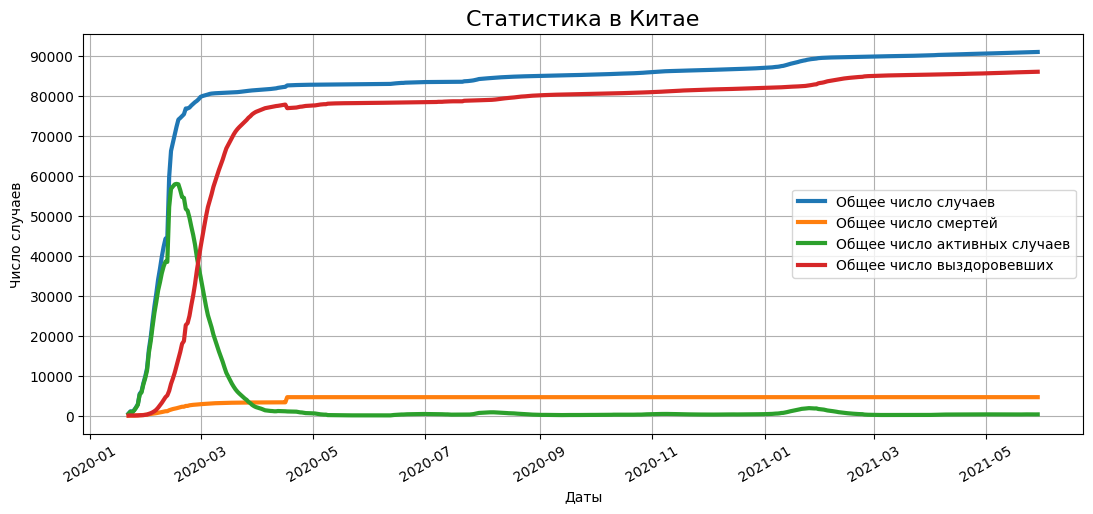

In [92]:
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
china_data = covid_df[covid_df['country']=='China']
china_grouped = china_data.groupby('date')[['confirmed', 'deaths', 'active', 'recovered']].sum()
axes.plot(china_grouped['confirmed'], label='Общее число случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших', lw=3)
axes.set_title('Статистика в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

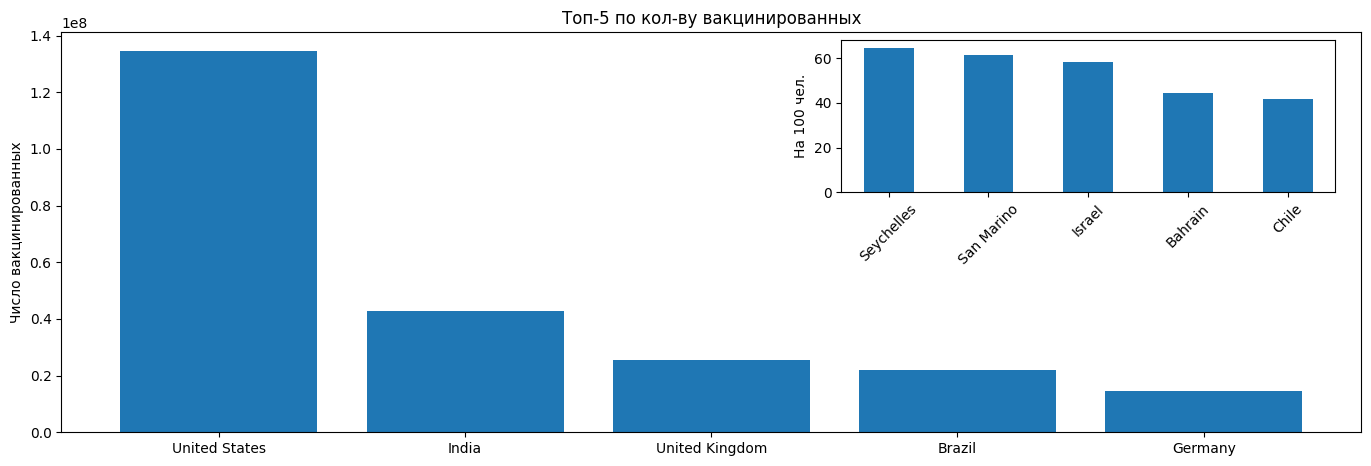

In [104]:
vac_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vac_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13,4))
main_axes = fig.add_axes([0,0,1,1])
inner_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

main_axes.bar(
    x=vac_country.index,
    height=vac_country
);
inner_axes.bar(
    x=vac_country_per_hundred.index,
    height=vac_country_per_hundred,
    width=0.5
);

main_axes.set_ylabel('Число вакцинированных')
main_axes.set_title('Топ-5 по кол-ву вакцинированных')
inner_axes.set_ylabel('На 100 чел.')
inner_axes.xaxis.set_tick_params(rotation=45)

Text(0.5, 1.0, 'Гистограмма числа заболевших')

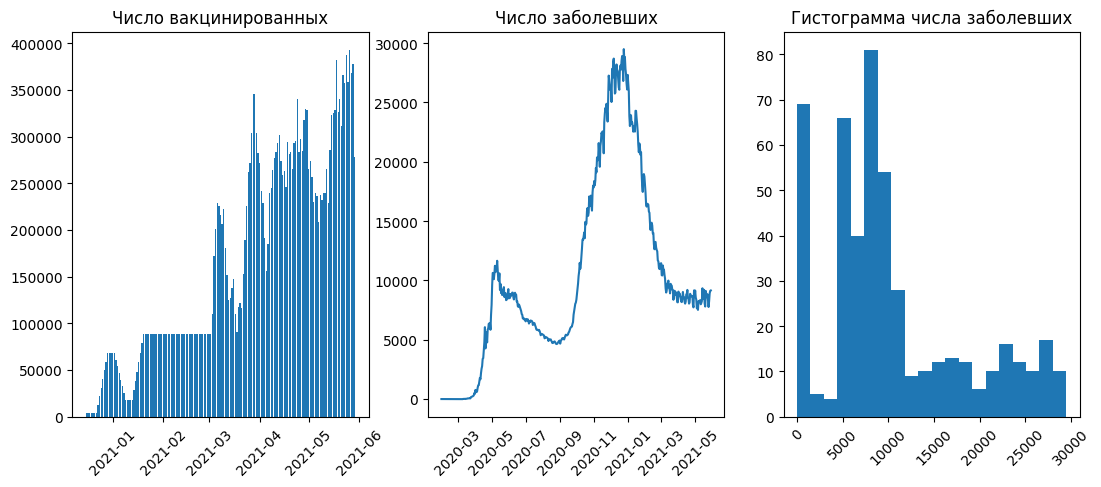

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))
rus_data = covid_df[covid_df['country']=='Russia']

axes[0].bar(
    x=rus_data['date'],
    height=rus_data['daily_vaccinations']
)
axes[0].set_title('Число вакцинированных')
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(
    rus_data['date'],
    rus_data['daily_confirmed'],
    label='Изменение заболеваемости',
    lw=1.5
);
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].set_title('Число заболевших')

axes[2].hist(
    x=rus_data['daily_confirmed'],
    bins=20,
    label='Число заболевших'
);
axes[2].xaxis.set_tick_params(rotation=45)
axes[2].set_title('Гистограмма числа заболевших')

In [ ]:
import seaborn as sns

countries = ['Russia', 'Canada', 'Australia', 'United Kingdom', 'Germany']
croped_covid_df=covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

croped_covid_df=croped_covid_df.merge(
    populations,
    on='country'
)

croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population']*100

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

<Axes: xlabel='daily_confirmed_per_hundred', ylabel='country'>

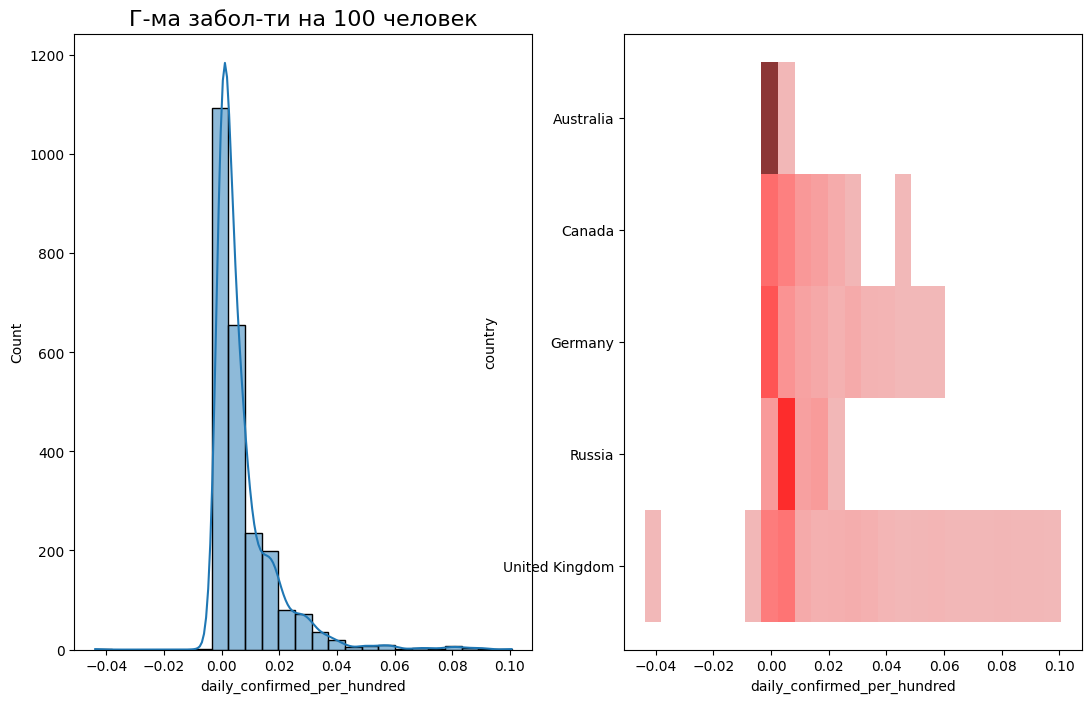

In [143]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(13,8)
)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Г-ма забол-ти на 100 человек', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)

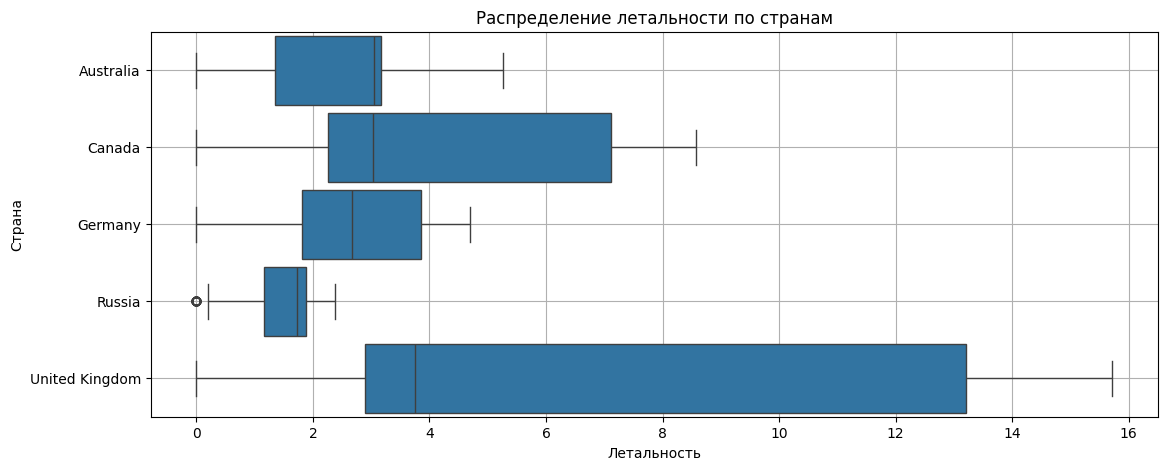

In [145]:
fig=plt.figure(figsize=(13,5))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
);
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

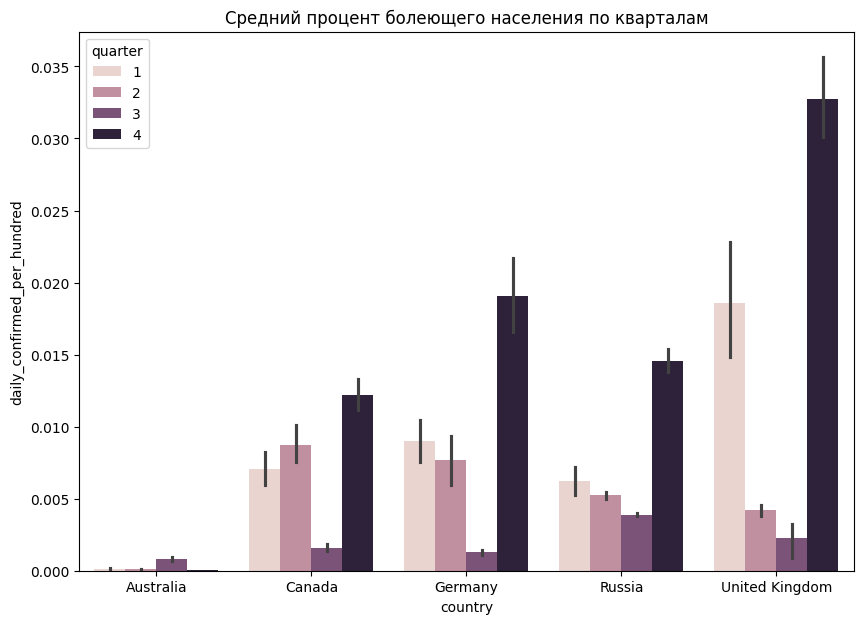

In [147]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам');

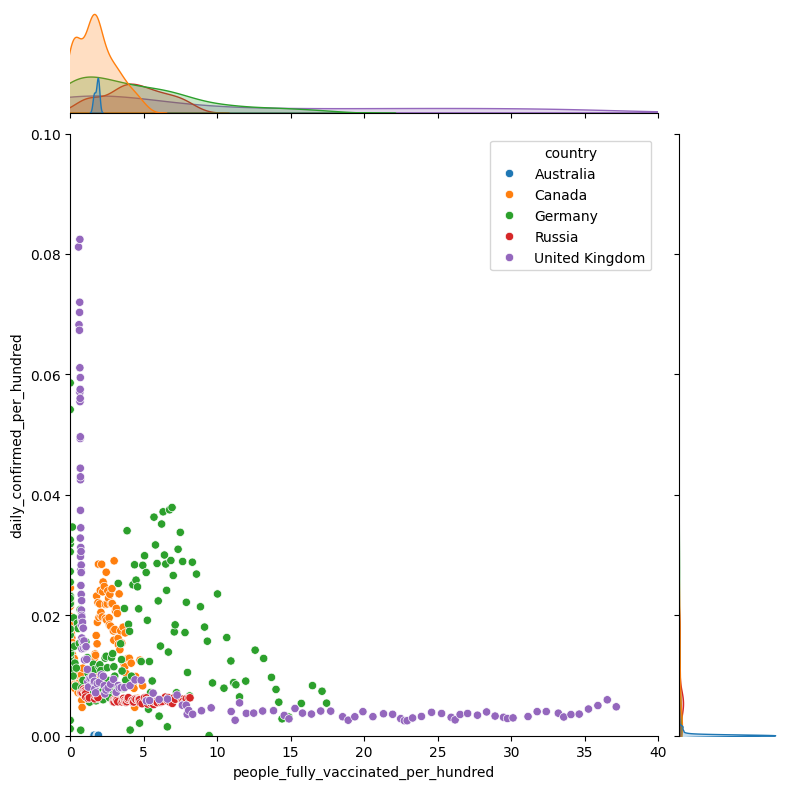

In [148]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

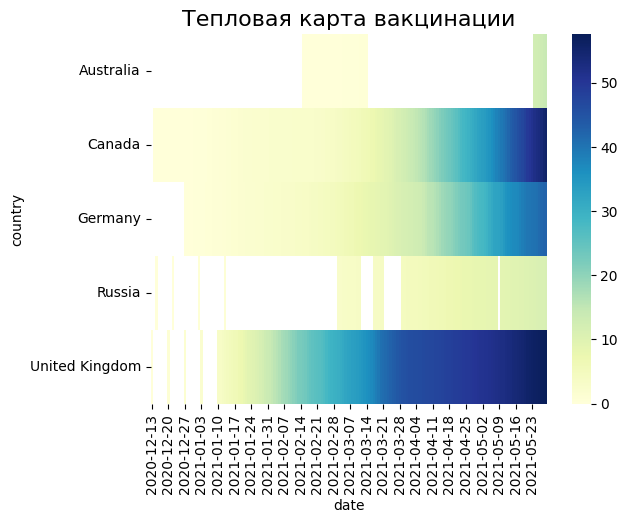

In [149]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

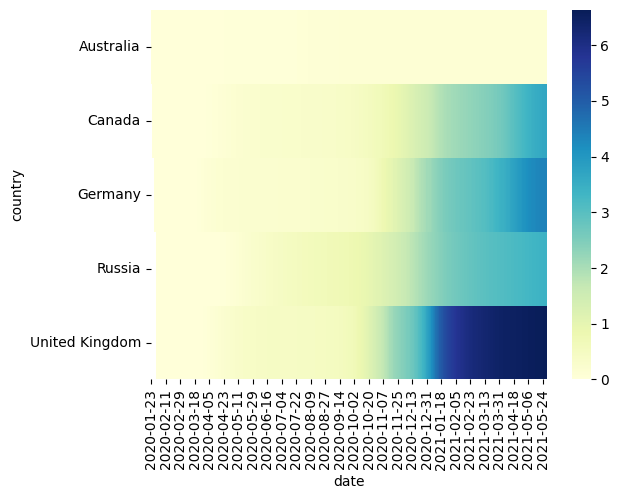

In [150]:
# Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом 
# к общему числу населения в странах (confirmed/population*100).
# Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) 
# в странах из таблицы croped_covid_df.
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population']*100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')

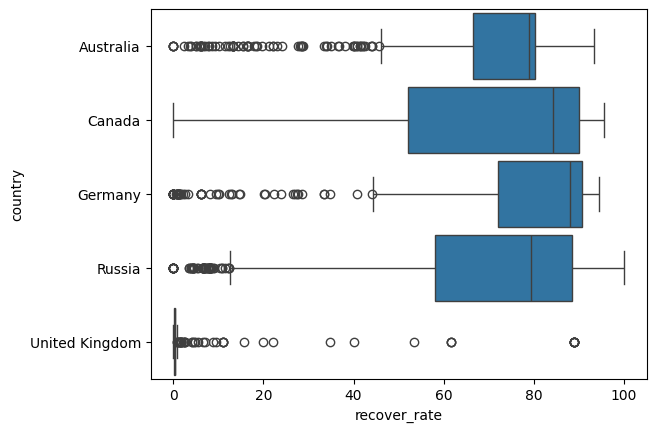

In [151]:
recov = sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    orient='h',
    width=0.9
)

In [153]:
import plotly
import plotly.express as px
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, 
    x='date',
    y=['confirmed', 'recovered', 'deaths', 'active'],
    height=500, 
    width=1000, 
    title='Confirmed, Recovered, Deaths, Active cases over Time' 
)
fig.show()

In [156]:
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

fig = px.bar(
    data_frame=bar_data, 
    x="country", 
    y="recover_rate", 
    color='country', 
    text = 'recover_rate', 
    orientation='v', 
    height=500, 
    width=1000, 
    title='Top 10 Countries for Recovery Rate' 
)

fig.show()

In [157]:
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

fig = px.treemap(
    data_frame=treemap_data, 
    path=['country'], 
    values='daily_recovered', 
    height=500, 
    width=1000, 
    title='Daily Recovered Cases by Country' 
)

fig.show()

In [173]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations="country", 
    locationmode = "country names", 
    color="confirmed", 
    animation_frame="date", 
    range_color=[0, 30e6], 
    title='Global Spread of COVID-19', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()

In [159]:
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

fig = px.scatter_3d(
    data_frame=scatter_data, 
    x = 'daily_confirmed', 
    y = 'daily_deaths', 
    z = 'daily_vaccinations',
    color='country', 
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

fig.show()

In [161]:
fig = px.line(
    data_frame = line_data,
    x='date',
    y='daily_vaccinations',
    height=500,
    width=1000
)
fig.show()

In [170]:
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='country',
    locationmode='country names',
    color='total_vaccinations',
    animation_frame='date',
    range_color=[0, 30e6],
    width=800,
    height=500,
    color_continuous_scale='Blues'
)
fig.show()